<a href="https://colab.research.google.com/github/thonguyen241206/DAP391m/blob/main/Lab2b_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
def load_iris_data():
  iris = load_iris()
  df = pd.DataFrame(data=iris.data, columns=iris.feature_names)   #chuyển qua dataframe
  df['target'] = iris.target
  return df
df = load_iris_data()
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
def prepare_data(df, feature_index=0, target_index=1):
  X = df.iloc[:, feature_index].values.reshape(-1, 1)
  y = df.iloc[:, target_index].values

  # Chia dữ liệu thành tập huấn luyện và tập kiểm tra
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  return X_train, X_test, y_train, y_test

In [17]:
def train_and_evaluate_model(X_train, X_test, y_train, y_test, feature_name, target_name):
  model = LinearRegression()
  model.fit(X_train, y_train)
  # Dự đoán và kiểm tra
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)
  # Tính các metric
  train_mse = mean_squared_error(y_train, y_train_pred)
  test_mse = mean_squared_error(y_test, y_test_pred)
  train_r2 = r2_score(y_train, y_train_pred)
  test_r2 = r2_score(y_test, y_test_pred)

  print(f"\n Kết quả hồi quy tuyến tính: {feature_name} -> {target_name}" )
  print(f"Điểm cắt (intercept): {model.intercept_:.4f}")
  print(f"Hệ số góc (slope): {model.coef_[0]:.4f}")
  print(f"Phương trình hồi quy: y= {model.intercept_:.4f} + {model.coef_[0]:.4f}x")
  print(f"  - MSE (train): {train_mse}")
  print(f"  - MSE (test): {test_mse}")
  print(f"  - R2 (train): {train_r2}")
  print(f"  - R2 (test): {test_r2}")

  plt.figure(figsize=(12,5))
  plt.subplot(1, 2, 1)
  plt.scatter(X_train, y_train, color='red', label='Dữ liệu gốc')
  plt.plot(X_train, y_train_pred, color='blue', linewidth=2, label='Đường hồi quy tuyến tính')
  plt.xlabel(feature_name)
  plt.ylabel(target_name)
  plt.title('Tập huấn luyện')
  plt.legend()
  plt.grid(True)

  plt.subplot(1, 2, 2)
  plt.scatter(X_test, y_test, color='red', label='Dữ liệu gốc')
  plt.plot(X_test, y_test_pred, color='blue', linewidth=2, label='Đường hồi quy tuyến tính')
  plt.xlabel(feature_name)
  plt.ylabel(target_name)
  plt.title('Tập kiểm tra')
  plt.legend()
  plt.grid(True)

  plt.tight_layout()
  plt.show()

  return model


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

 Kết quả hồi quy tuyến tính: sepal length (cm) -> sepal width (cm)
Điểm cắt (intercept): 3.4003
Hệ số góc (slope): -0.0583
Phương trình hồi quy: y= 3.4003 + -0.0583x
  - MSE (train): 0.1977435614202178
  - MSE (test): 0.13961895650579023
  - R2 (train): 0.011433223934143366
  - R2 (test): 0.024098626473972984


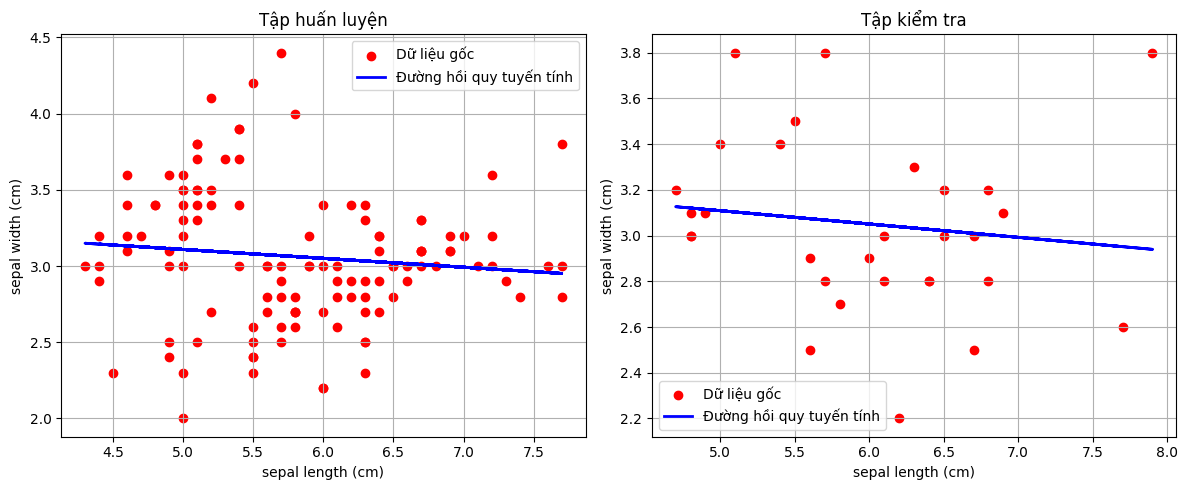

In [19]:
# Load dữ liệu
df = load_iris_data()
print(df.head())

feature_names = df.columns[:-1]
print(feature_names)
feature_index = 0;
target_index = 1;

X_train, X_test, y_train, y_test = prepare_data(df, feature_index, target_index)
model = train_and_evaluate_model(X_train, X_test, y_train, y_test,  feature_names[feature_index], feature_names[target_index])